In [1]:
import os
import sys
sys.path.insert(1, '../src/')
import utils as ut
import evals as evals
import scot2 as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ot
import pandas as pd

In [2]:
### Change working directory to /data in order to import the data
os.chdir("../data/")

### Read and normalize the data:
X=np.loadtxt("acc_30.txt")
y=np.loadtxt("met_30.txt")
z=np.loadtxt("rna_30.txt")
X_labels = np.loadtxt("acc_stage.txt")
y_labels = np.loadtxt("met_stage.txt")
z_labels = np.loadtxt("rna_stage.txt")

X=ut.unit_normalize(X)
y=ut.unit_normalize(y)
z=ut.unit_normalize(z)
print(X.shape)
print(y.shape)
print(z.shape)

(647, 30)
(725, 30)
(597, 30)


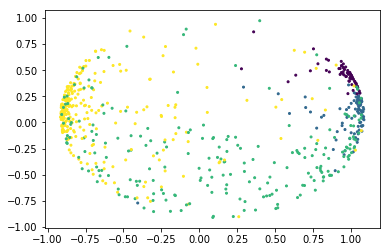

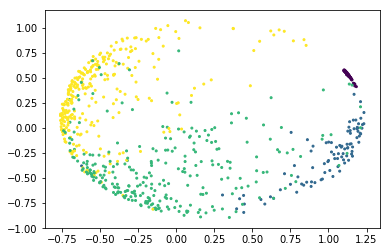

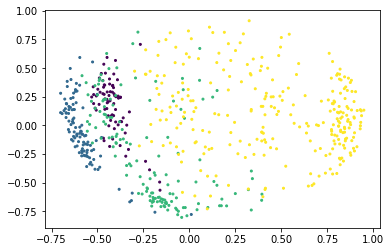

In [3]:
### plot the data
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:, 1], s = 4, c = X_labels)
plt.show()

y_pca = pca.fit_transform(y)
plt.scatter(y_pca[:,0], y_pca[:, 1], s = 4, c = y_labels)
plt.show()

z_pca = pca.fit_transform(z)
plt.scatter(z_pca[:,0], z_pca[:, 1], s = 4, c = z_labels)
plt.show()


# Balanced Alignment

In [4]:
# initialize SCOT object (with X projected onto y)
scot=sc.SCOT(X, y)
X_new, y_new = scot.align(k=60, e=0.007, normalize=False, balanced = True)

It.  |Err         
-------------------
    0|7.835771e-04|
   10|1.728572e-04|
   20|8.279779e-07|
   30|1.258105e-07|
   40|3.087533e-08|
   50|7.578022e-09|
   60|1.859885e-09|
   70|4.564717e-10|


In [5]:
# compute label transfer accuracy 
lta=evals.transfer_accuracy(X_new, y_new, X_labels, y_labels, 5)
print("Label transfer accuracy for this alignment with X onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(y_new, X_new, y_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with X onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with X onto Y is:  0.794435857805255
Label transfer accuracy for this alignment with X onto Y is:  0.7903448275862069


In [8]:
# initialize SCOT object (with z projected onto y)
scot=sc.SCOT(z, y)
z_new, y_new = scot.align(k=5, e=0.007, normalize=False, balanced = True)

It.  |Err         
-------------------
    0|1.942297e-03|
   10|1.080499e-04|
   20|1.207234e-06|
   30|2.208901e-08|
   40|4.600396e-10|


In [9]:
# compute label transfer accuracy between y,z
lta=evals.transfer_accuracy(z_new, y_new, z_labels, y_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(y_new, z_new, y_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto Y is:  0.8927973199329984
Label transfer accuracy for this alignment with Z onto Y is:  0.7737931034482759


In [10]:
# initialize SCOT object (with z projected onto X)
scot=sc.SCOT(z, X)
z_new2, X_new2 = scot.align(k=5, e=0.01, normalize=False, balanced = True)

It.  |Err         
-------------------
    0|1.608970e-03|
   10|5.251315e-05|
   20|1.163917e-05|
   30|2.750648e-06|
   40|6.126734e-07|
   50|1.347330e-07|
   60|2.954753e-08|
   70|6.476027e-09|
   80|1.419186e-09|
   90|3.109981e-10|


In [11]:
# compute label transfer accuracy between z, x (directly)
lta=evals.transfer_accuracy(z_new2, X_new2, z_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with Z onto X is: ", np.mean(lta))

lta=evals.transfer_accuracy(X_new2, z_new2, X_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto X is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto X is:  0.9396984924623115
Label transfer accuracy for this alignment with Z onto X is:  0.7635239567233385


In [12]:
# compute label transfer accuracy between z, X (going through y)
lta=evals.transfer_accuracy(z_new, X_new, z_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(X_new, z_new, X_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto Y is:  0.8291457286432161
Label transfer accuracy for this alignment with Z onto Y is:  0.7465224111282844


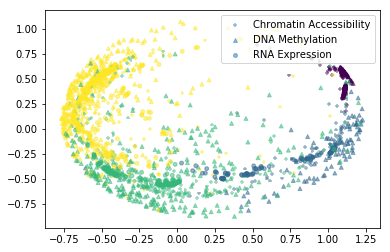

In [13]:
# plot the transport
Xyz_pca = pca.fit_transform(np.concatenate((X_new, y_new, z_new), axis=0))
X_pca = Xyz_pca[0:X.shape[0],]
y_pca = Xyz_pca[X.shape[0]:X.shape[0]+y.shape[0],]
z_pca = Xyz_pca[X.shape[0]+y.shape[0]:,]

plt.scatter(X_pca[:,0], X_pca[:,1], s=15, label="Chromatin Accessibility", alpha = 0.5, c = X_labels, marker = "+")
plt.scatter(y_pca[:,0], y_pca[:,1], s=15, label="DNA Methylation", alpha = 0.5, c = y_labels, marker = "^")
plt.scatter(z_pca[:,0], z_pca[:,1], s=15, label="RNA Expression", alpha = 0.5, c = z_labels, marker = "o")
plt.legend()
plt.show()

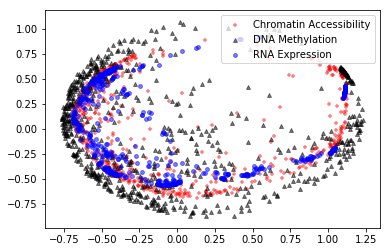

In [14]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=15, label="Chromatin Accessibility", alpha = 0.5, c = 'r', marker = "+")
plt.scatter(y_pca[:,0], y_pca[:,1], s=15, label="DNA Methylation", alpha = 0.5, c = 'k', marker = "^")
plt.scatter(z_pca[:,0], z_pca[:,1], s=15, label="RNA Expression", alpha = 0.5, c = 'b', marker = "o")
plt.legend()
plt.show()

In [15]:
# compute label transfer accuracy for all 3 with 2nd domain as base
lta=evals.transfer_accuracy(y_new, np.concatenate((X_new, z_new), axis=0), y_labels, np.concatenate((X_labels, z_labels)), 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(np.concatenate((X_new, z_new), axis=0), y_new,  np.concatenate((X_labels, z_labels)),y_labels, 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with X, Z onto Y is:  0.8193103448275862
Label transfer accuracy for this alignment with X, Z onto Y is:  0.8416398713826366


In [16]:
# compute label transfer accuracy for all 3 with 1st domain as base
lta=evals.transfer_accuracy(X_new, np.concatenate((y_new, z_new), axis=0), X_labels, np.concatenate((y_labels, z_labels)), 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(np.concatenate((y_new, z_new), axis=0), X_new,  np.concatenate((y_labels, z_labels)),X_labels, 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with X, Z onto Y is:  0.749613601236476
Label transfer accuracy for this alignment with X, Z onto Y is:  0.8078668683812406


In [17]:
# compute label transfer accuracy for all 3 with 3rd domain as base
lta=evals.transfer_accuracy(z_new, np.concatenate((y_new, X_new), axis=0), z_labels, np.concatenate((y_labels, X_labels)), 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(np.concatenate((y_new, X_new), axis=0), z_new,  np.concatenate((y_labels, X_labels)),z_labels, 5)
print("Label transfer accuracy for this alignment with X, Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with X, Z onto Y is:  0.8408710217755444
Label transfer accuracy for this alignment with X, Z onto Y is:  0.760932944606414


In [18]:
Xyz = np.concatenate(( X_new, y_new, z_new))
Xyz_labels = np.concatenate((X_labels, y_labels, z_labels))
sub_idx = np.random.permutation(Xyz.shape[0])
Xyz = Xyz[sub_idx, :]
Xyz_labels = Xyz_labels[sub_idx]

lta=evals.transfer_accuracy(Xyz[:(Xyz.shape[0] //2),:], Xyz[(Xyz.shape[0] //2):,:], 
                            Xyz_labels[:(Xyz.shape[0] //2)].reshape(-1, 1), Xyz_labels[(Xyz.shape[0] //2):].reshape(-1, 1), 5)
print("Label transfer accuracy for randomly splitting the alignment data is ", lta)


Label transfer accuracy for randomly splitting the alignment data is  0.8546747967479674


../src/evals.py:140: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(domain2, type2)


# Unbalanced

In [19]:
# initialize SCOT object (with X projected onto y)
scot=sc.SCOT(X, y)
X_new, y_new = scot.align(k=80, e=0.005, rho = 0.5, normalize=False, balanced = False)

It.  |Err         
-------------------
    0|9.380355e-04|
   10|1.064730e-04|
   20|1.530780e-06|
   30|6.349173e-08|


In [20]:
# compute label transfer accuracy 
lta=evals.transfer_accuracy(X_new, y_new, X_labels, y_labels, 5)
print("Label transfer accuracy for this alignment with X onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(y_new, X_new, y_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with X onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with X onto Y is:  0.7975270479134466
Label transfer accuracy for this alignment with X onto Y is:  0.7806896551724138


In [21]:
# initialize SCOT object (with z projected onto y)
scot=sc.SCOT(z, y)
z_new, y_new = scot.align(k=10, e=0.005, rho = 0.5, normalize=False, balanced = False)

It.  |Err         
-------------------
    0|1.987383e-03|
   10|1.975781e-04|
   20|4.242303e-05|
   30|2.319605e-05|
   40|6.512076e-06|
   50|2.315854e-05|
   60|2.442700e-05|
   70|6.272628e-06|
   80|2.318946e-05|
   90|6.435440e-06|
  100|2.316433e-05|
  110|2.443433e-05|
  120|6.265734e-06|
  130|2.319056e-05|
  140|6.400116e-06|
  150|2.316922e-05|
  160|2.444064e-05|
  170|6.259800e-06|
  180|2.379096e-05|
  190|6.374613e-06|
It.  |Err         
-------------------
  200|2.317341e-05|
  210|2.444600e-05|
  220|6.254778e-06|
  230|2.443709e-05|
  240|6.351971e-06|
  250|2.317697e-05|
  260|2.445053e-05|
  270|6.250532e-06|
  280|2.435352e-05|
  290|6.332722e-06|
  300|2.317999e-05|
  310|2.445437e-05|
  320|2.344509e-05|
  330|2.438138e-05|
  340|6.316405e-06|
  350|2.318255e-05|
  360|2.445762e-05|
  370|2.335683e-05|
  380|2.439516e-05|
  390|6.302607e-06|
It.  |Err         
-------------------
  400|2.318472e-05|
  410|2.446037e-05|
  420|2.312538e-05|
  430|2.440759e-05|
  4

In [22]:
# compute label transfer accuracy between y,z
lta=evals.transfer_accuracy(z_new, y_new, z_labels, y_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(y_new, z_new, y_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto Y is:  0.8777219430485762
Label transfer accuracy for this alignment with Z onto Y is:  0.8165517241379311


In [23]:
# initialize SCOT object (with z projected onto X)
scot=sc.SCOT(z, X)
z_new2, X_new2 = scot.align(k=10, e=0.001, rho = 0.5, normalize=False, balanced = False)

It.  |Err         
-------------------
    0|2.972594e-03|
   10|6.184691e-04|
   20|1.884984e-04|
   30|3.859068e-05|
   40|1.017888e-05|
   50|2.821593e-06|
   60|7.912969e-07|


In [24]:
# compute label transfer accuracy between z, x (directly)
lta=evals.transfer_accuracy(z_new2, X_new2, z_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with Z onto X is: ", np.mean(lta))

lta=evals.transfer_accuracy(X_new2, z_new2, X_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto X is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto X is:  0.9078726968174204
Label transfer accuracy for this alignment with Z onto X is:  0.7557959814528593


In [25]:
# compute label transfer accuracy between z, X (going through y)
lta=evals.transfer_accuracy(z_new, X_new, z_labels, X_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

lta=evals.transfer_accuracy(X_new, z_new, X_labels, z_labels, 5)
print("Label transfer accuracy for this alignment with Z onto Y is: ", np.mean(lta))

Label transfer accuracy for this alignment with Z onto Y is:  0.864321608040201
Label transfer accuracy for this alignment with Z onto Y is:  0.7758887171561051


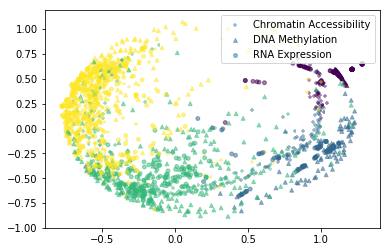

In [26]:
# plot the transport
Xyz_pca = pca.fit_transform(np.concatenate((X_new, y_new, z_new), axis=0))
X_pca = Xyz_pca[0:X.shape[0],]
y_pca = Xyz_pca[X.shape[0]:X.shape[0]+y.shape[0],]
z_pca = Xyz_pca[X.shape[0]+y.shape[0]:,]

plt.scatter(X_pca[:,0], X_pca[:,1], s=15, label="Chromatin Accessibility", alpha = 0.5, c = X_labels, marker = "+")
plt.scatter(y_pca[:,0], y_pca[:,1], s=15, label="DNA Methylation", alpha = 0.5, c = y_labels, marker = "^")
plt.scatter(z_pca[:,0], z_pca[:,1], s=15, label="RNA Expression", alpha = 0.5, c = z_labels, marker = "o")
plt.legend()
plt.show()

In [27]:
Xyz = np.concatenate(( X_new, y_new, z_new))
Xyz_labels = np.concatenate((X_labels, y_labels, z_labels))
sub_idx = np.random.permutation(Xyz.shape[0])
Xyz = Xyz[sub_idx, :]
Xyz_labels = Xyz_labels[sub_idx]

lta=evals.transfer_accuracy(Xyz[:(Xyz.shape[0] //2),:], Xyz[(Xyz.shape[0] //2):,:], 
                            Xyz_labels[:(Xyz.shape[0] //2)].reshape(-1, 1), Xyz_labels[(Xyz.shape[0] //2):].reshape(-1, 1), 5)
print("Label transfer accuracy for randomly splitting the alignment data is ", lta)


Label transfer accuracy for randomly splitting the alignment data is  0.8536585365853658


../src/evals.py:140: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(domain2, type2)
